<a href="https://colab.research.google.com/github/jefferson2601/Google_Colab/blob/main/Projeto_Cassificador_Sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Os arquivos já estão extraídos.
                                                text label  \
0  When its DVD was released i came to market and...   pos   
1  Michael Cacoyannis has had a relatively long c...   pos   
2  I think this has the potential of being the be...   pos   
3  One of the best movies for all ages. You will ...   pos   
4  The idea ia a very short film with a lot of in...   pos   

                                        cleaned_text  
0  when its dvd was released i came to market and...  
1  michael cacoyannis has had a relatively long c...  
2  i think this has the potential of being the be...  
3  one of the best movies for all ages you will n...  
4  the idea ia a very short film with a lot of in...  
Acurácia: 0.847

Relatório de Classificação:
               precision    recall  f1-score   support

         neg       0.85      0.84      0.85      2485
         pos       0.84      0.85      0.85      2515

    accuracy                           0.85      5000
 

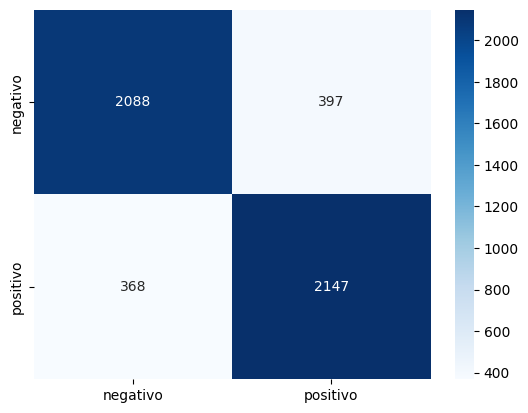

In [15]:
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer
import nltk

# Baixar os recursos necessários
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# Caminho do arquivo .tar
TAR_PATH = "/content/aclImdb_v1.tar.gz"
EXTRACT_PATH = "/content/"
DATASET_PATH = os.path.join(EXTRACT_PATH, "aclImdb")
TRAIN_PATH = os.path.join(DATASET_PATH, "train")

# Extração do arquivo .tar
if not os.path.exists(DATASET_PATH):
    with tarfile.open(TAR_PATH, 'r') as tar_ref:
        tar_ref.extractall(EXTRACT_PATH)
    print("Extração concluída!")
else:
    print("Os arquivos já estão extraídos.")

# Função para carregar os textos e rótulos
def load_imdb_data(directory):
    data = []
    labels = []
    for label in ["pos", "neg"]:
        path = os.path.join(directory, label)
        for filename in os.listdir(path):
            with open(os.path.join(path, filename), "r", encoding="utf-8") as file:
                data.append(file.read())
                labels.append(label)
    return data, labels

# Função de limpeza de texto
def simple_clean_text(text):
    # Remover pontuação
    text = re.sub(r'[^\w\s]', '', text)
    # Converter para minúsculas
    text = text.lower()
    return text

df['cleaned_text'] = df['text'].apply(simple_clean_text)

# Visualizando os dados limpos
print(df.head())

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Vetorização dos textos usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Treinando o modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Realizando previsões
y_pred = nb_model.predict(X_test_tfidf)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.show()


In [16]:
# Criando o vetor de TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Aplicando a transformação no texto limpo
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Mostrando o formato da matriz resultante (número de amostras e características)
print(X.shape)

(25000, 5000)


In [17]:
# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (20000, 5000)
Tamanho do conjunto de teste: (5000, 5000)


In [18]:
# Criando e treinando o modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
# Prevendo os resultados no conjunto de teste
y_pred = nb_classifier.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.8490
Relatório de Classificação:
               precision    recall  f1-score   support

         neg       0.85      0.84      0.85      2485
         pos       0.84      0.86      0.85      2515

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

Matriz de Confusão:
 [[2087  398]
 [ 357 2158]]
